In [2]:
import sqlite3 
import pandas as pd
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df = df.drop(columns = ['attributes','hours'])
conn = sqlite3.connect('eas503project.db')
df.to_sql('business',conn,if_exists='replace', index=False)
c = conn.cursor()
c.execute("SELECT COUNT(*) FROM business")
results = c.fetchall()
print(results)

[(192609,)]


In [61]:
na = df.isna().sum()
#print(na) # 482 rows do not vategory values since its only 0.2% of the data, we will be removing all rows containing no data for business categories
business = df.dropna()
len(business) # 192127 rows remaining after dropping all rows having NA values

192127

In [5]:
business.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [6]:
bus = business.sort_values('review_count', ascending=False)
bus.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
82250,3655 Las Vegas Blvd S,4JNXUYY8wbaaDmk3BPzlWw,"Food, French, Breakfast & Brunch, Restaurants,...",Las Vegas,1,36.112859,-115.172434,Mon Ami Gabi,89109,8348,4.0,NV
89206,3570 S Las Vegas Blvd,RESDUcs7fIiihp38-d6_6g,"Restaurants, Buffets, Sandwiches, Food, Breakf...",Las Vegas,1,36.116113,-115.176222,Bacchanal Buffet,89109,8339,4.0,NV
35199,3708 Las Vegas Blvd S,K7lWdNUhCbcnEvI0NhGewg,"Buffets, Breakfast & Brunch, Restaurants",Las Vegas,1,36.109550,-115.176155,Wicked Spoon,89109,6708,3.5,NV
58852,3535 Las Vegas Blvd,f4x1YBxkLrZg652xt2KR5g,"Breakfast & Brunch, Food, Restaurants, America...",Las Vegas,1,36.118181,-115.171580,Hash House A Go Go,89109,5763,4.0,NV
141820,3667 Las Vegas Blvd S,cYwJA2A6I12KNkm2rtXd5g,"Restaurants, Burgers, American (Traditional)",Las Vegas,0,36.110724,-115.172169,Gordon Ramsay BurGR,89109,5484,4.0,NV


In [12]:
#are all business Id's unique?
business.business_id.is_unique #business_id is all unique


True

In [26]:
# How many business are open?
business['is_open'].value_counts()
# 158064 are open; rest 34063 business are closed

1    158064
0     34063
Name: is_open, dtype: int64

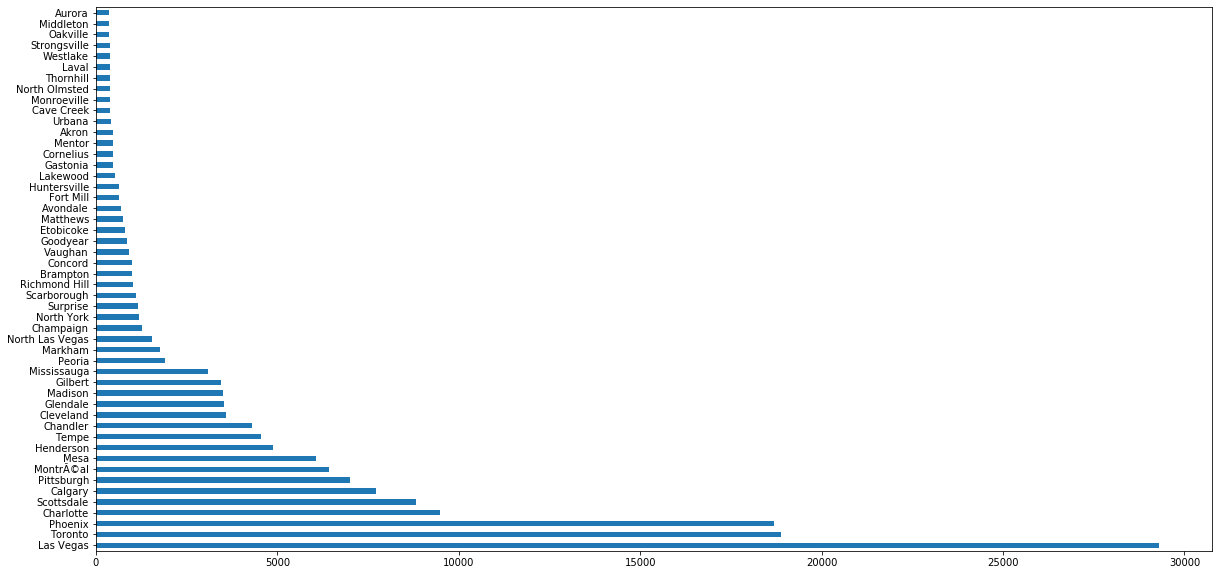

In [54]:
# Top 10 cities with the most business parties mentioned in Yelp.
import matplotlib.pyplot as plt
top50cities = business.city.value_counts().nlargest(50)
top50cities.plot(kind="barh", figsize=(20,10))
plt.title('Top 50 cities by businesses listed')
plt.show()

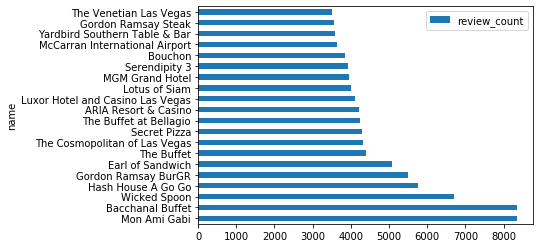

In [56]:
# Top 10 most reviewed business
top10ReviewedBusiness = business[['name', 'review_count']].sort_values(ascending=False, by="review_count")[0:20]
top10ReviewedBusiness.plot(kind='barh',x='name',y='review_count')
plt.title('Top 50 cities by businesses')
plt.show()

4.0    35948
3.5    34972
5.0    28197
4.5    27293
3.0    25969
2.5    18754
2.0    11373
1.5     4908
1.0     4713
Name: stars, dtype: int64


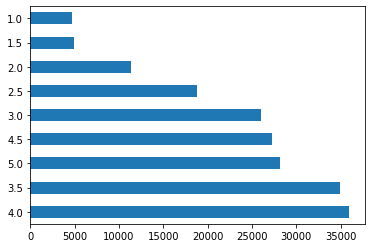

In [60]:
stars = business['stars'].value_counts()
print(stars)
stars.plot(kind='barh')
plt.show()

In [ ]:
# Most Popular Business Category
categories = business['categories'].str.split(",")
print(categories)